(ch:linear-correlation-1)=
# 선형 상관관계 2

상관관계는 선형 상관관계와 비선형 상관관계로 나뉜다.
선형 상관관계는 하나의 데이터 값이 증가함에 따라 다른 데이터 값이 일차함수로 
단조증가(양의 상관관계) 또는 단조감소(음의 상관관계)를 의미한다.
반면에 비선형 상관관계는 일차함수보다 복잡한 함수로 나타나는 경우를 말한다.

2차원 데이터를 다루는 대부분의 경우, 선형 상관관계 여부를 분석하며, 이를 평가하기 위한 척도로서
공분산<font size='2'>covariance</font>과 상관계수<font size='2'>correlation coefficient</font>를 사용한다.

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/statsRev/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/statsRev/refs/heads/master/data/'

## 삶의 만족도 데이터셋

OECD(경제협력개발기구)가 2011년부터 매년 발표하는 
[**더 나은 삶 지수**<font size='2'>Better Life Index(BLI)</font>](https://www.oecd.org/en/data/tools/oecd-better-life-index.html)는 
단순한 경제 성장 지표(GDP 등)를 넘어서,
국민의 삶의 질을 다각도로 평가하고 비교하기 위해 만들어진 지표다.

더 나은 삶 지수(BLI)는 삶의 질을 구성하는 11개 영역을 기준으로 OECD 회원국의 웰빙 수준을 측정한다.

| 항목 | 설명 |
|------|------|
| 소득 | 가처분 소득 수준 |
| 일자리 | 고용률, 일자리 안정성 |
| 주거 | 주거 환경과 비용 |
| 건강 | 기대수명, 건강 상태 |
| 교육 | 교육 수준 및 접근성 |
| 환경 | 대기질, 수질 등 |
| 공동체 | 사회적 연결과 신뢰 |
| 시민참여 | 정치적 참여와 민주적 권리 |
| 안전 | 범죄율, 생활 안전 |
| 삶의 만족도 | 주관적 행복도 |
| 일과 삶의 균형 | 여가 시간, 근로시간 등 |

여기서는 11개 지표 중에서 2015년도와 2024년도 OECD 36개 회원국가의 '삶의 만족도' 데이터를 활용한다.

In [7]:
life_satisfaction = pd.read_csv(data_url + "life_satisfaction_2015_2024.csv", index_col='Country')
life_satisfaction

,2015,2024
Country,,
Australia,7.3,7.1
Austria,6.9,7.2
Belgium,6.9,6.8
Brazil,7.0,6.1
Canada,7.3,7.0
Chile,6.7,6.2
Czech Republic,6.5,6.9
Denmark,7.5,7.5
Estonia,5.6,6.5


연도별로 각각 36개의 부동소수점이 포함되어 있음을 확인한다.

In [8]:
life_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Australia to United States
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2015    36 non-null     float64
 1   2024    36 non-null     float64
dtypes: float64(2)
memory usage: 864.0+ bytes


## 상관관계와 산점도

2015년도 국가별 삶의 만족도와 2024년도 국가별 삶의 만족도 사이의 상관관계 여부를 시각적으로 확인하기 위해
**산점도**<font size='2'>scatter plot</font>를 그려본다.
산점도는 `matplotlib.pyplot` 라이브러리에 포함된 `scatter()` 함수를 이용하여 그린다.

먼저 2015년 데이터와 2024년 데이터를 나눠 넘파이 어레이로 지정한다.

In [10]:
life_satisfaction_2015 = np.array(life_satisfaction['2015'])
life_satisfaction_2024 = np.array(life_satisfaction['2024'])

아래 코드에서 그리는 산점도는 x-축이 2015년도 국가별 삶의 만족도, y-축이 2024년도 국가별 삶의 만족도다.

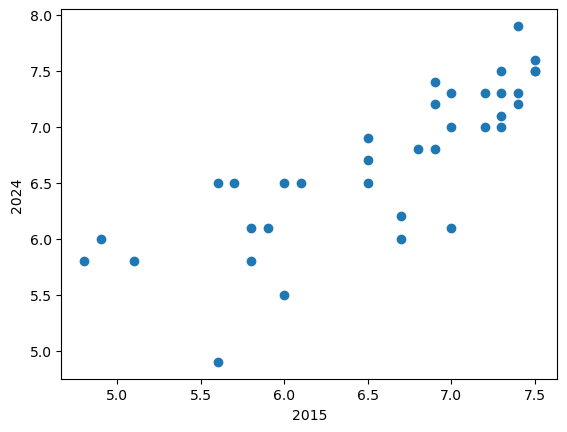

In [24]:
plt.scatter(life_satisfaction_2015, life_satisfaction_2024)

plt.xlabel('2015')
plt.ylabel('2024')

plt.show()

위 산점도는 2015년도 국가별 삶의 만족도가 높아질수록 2024년도 국가별 삶의 만족도도 올라가는 경향이 있음을 보여준다.
즉 두 데이터는 양의 선형 상관관계를 갖는다고 추측할 수 있다.

이제 선형 상관관계를 수치화한 두 가지 척도, 
**공분산**<font size='2'>covariance</font>과 
**상관계수**<font size='2'>correlation coefficient</font>를 통해 살펴보자. 
먼저 공분산을 소개한다.

## 공분산

{numref}`%s장 <ch:representatives>`에서
다룬 분산<font size='2'>variance</font>은 한 종류의 데이터 
$X=\{ x_1,\cdots, x_n \}$에 대해 샘플값들의 편차의 제곱의 평균값이다.
아래 식과 같이 계산되며, 샘플값들이 평균으로부터 떨어져있는 정도를 나타내는 양의 측정치이다.

$$
S_X^2 = \frac 1 n \sum_{i=1}^{n} (x_i - \bar x)^2 = \frac 1 n \left\{(x_1 - \bar x)^2 + (x_2 - \bar x)^2 + \cdots + (x_n - \bar x)^2 \right \}
$$


공분산<font size='2'>covariance</font>은 두 종류의 데이터 $X=\{ x_1, \cdots, x_n \}$와 $Y=\{ y_1,
\cdots, y_n \}$에 대해 다음과 같이 정의하며 $S_{XY}$로 표기하자.

$$
\begin{align*}
S_{XY} & = \frac 1 n \sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y) \\
&= \frac 1 n \left\{ (x_1 - \bar x)(y_1 - \bar y) + (x_2 - \bar x)(y_2 - \bar y) + \cdots + (x_n - \bar x)(y_n - \bar y) \right\}
\end{align*}
$$

위의 두 식으로부터 알 수 있는 사실은, 분산과 달리 공분산은 음수가 나올 수 있다는 것이다.
분산은 한 종류의 데이터에 대해 편차의 제곱의 평균이므로 항상 양의 값을 갖는다. 하지만 공분산은 두 종류의 데이터에 대해 편차의 곱의 평균인데, 곱해지는 편차의 부호가 다른 항들은 음수가 되므로 평균 또한 음수가 될 수 있다.

넘파이와 판다스 모두 공분산을 계산하는 API를 제공하는데, 넘파이의 `cov()` 함수와 데이터프레임의 `cov()` 메서드가 그것이다.

**넘파이의 `cov()` 함수**

아래 코드는 넘파이의 `cov()` 함수를 이용해 두 데이터의 공분산을 계산한다. (2, 2) 행렬 모양의 어레이가 생성되는데, 이 어레이의 항목별 의미는 다음과 같다.

| 인덱스 | 의미 |
| :---: | :--- |
| `[0, 0]` | 2015년도 삶의 만족도의 분산 |
| `[0, 1]` | 2015년도 삶의 만족도와 2024년도 삶의 만족도의 공분산 |
| `[1, 0]` | 2024년도 삶의 만족도와 2015년도 삶의 만족도의 공분산 |
| `[1, 1]` | 2024년도 삶의 만족도의 분산 |

In [12]:
cov_mat = np.cov(life_satisfaction_2015, life_satisfaction_2024, ddof=0)
cov_mat

array([[0.605278, 0.428009],
       [0.428009, 0.464159]])

공분산의 계산식으로부터 알 수 있듯이, '2015년도 국가별 삶의 만족도와 2024년도 국가별 삶의 만족도의 공분산'과
'2024년도 국가별 삶의 만족도와 2015년도 국가별 삶의 만족도의 공분산'은 동일하다. 
아래 두 코드는 각 연도별 공분산은 해당 연도의 표본분산과 일치하는지 확인해준다.

In [13]:
print("2015년도 국가별 삶의 만족도 분산:", np.var(life_satisfaction_2015, ddof=0))

2015년도 국가별 삶의 만족도 분산: 0.6052777777777778


In [14]:
print("2024년도 국가별 삶의 만족도분산:", np.var(life_satisfaction_2024, ddof=0))

2024년도 국가별 삶의 만족도분산: 0.46415895061728396


**데이터프레임의 `cov()` 메서드**

데이터프레임 객체의 `cov()` 메서드는 모든 특성들 사이의 공분산을 계산한다.
데이터프레임`life_satisfaction`에 `2015`와 `2024` 두 개의 특성이 있으므로, (2, 2) 행렬 모양의 데이터프레임을 생성한다.

앞서 `np.cov()`의 반환값을 설명할 때 사용된 인덱스가 여기서는 특성명으로 대체된다.

In [15]:
life_satisfaction.cov(ddof=0)

,2015,2024
2015,0.605278,0.428009
2024,0.428009,0.464159


**참고**

`ddof=1`로 지정하면 불편분산이 계산된다.

In [16]:
cov_mat = np.cov(life_satisfaction_2015, life_satisfaction_2024, ddof=1)
cov_mat

array([[0.622571, 0.440238],
       [0.440238, 0.477421]])

In [17]:
life_satisfaction.cov(ddof=1)

,2015,2024
2015,0.622571,0.440238
2024,0.440238,0.477421


## 상관계수

공분산은 데이터의 크기와 단위에 따라 계산된 값의 크기와 단위가 달라진다.
예를 들어 학생들의 키와 체중을 대상으로 공분산을 계산한다면 단위가 `cm * kg`이 되고,
멀리뛰기와 오래 매달리기의 공분산은 단위가 `m * sec`이 된다.
또한, 동일한 단위를 사용한다 하더라도 데이터 값의 척도(scale)에 따라 공분산 값도 많이 달라질 수 있다.

따라서 공분산 값의 절대적 크기는 선형 상관관계의 강도를 측정하는 기준이 될 수 없다. 이 점을 보완한 척도가 **상관계수**<font size='2'>correlation coefficient</font>이다. 여러가지 상관계수가 있으나, 가장 대표적인 것이 **피어슨 상관계수**<font size='2'>Pearson correlation coefficient</font>이다. 데이터 $X$와 $Y$의 피어슨 상관계수 $r_{XY}$는 공분산 $S_{XY}$을 각 데이터의 표준편차 $S_X$와 $S_Y$로 나눈 값이다. 아래 계산식으로부터 알 수 있듯이, 두 데이터의 단위 및 척도(scale)와 무관한, 항상 -1과 1 사이의 값이 나온다.

$$
r_{xy} = \frac{S_{xy}}{S_x \cdot S_y}
$$

피어슨 상관계수의 값으로부터 두 데이터의 상관관계는 다음과 같이 평가된다.

| 상관계수 | 의미 |
| :--- | :--- |
| 1에 가까운 값 | 양의 상관관계가 강함 |
| -1에 가까운 값 | 음의 상관관계가 강함 |
| 0에 가까운 값 | 상관관계가 거의 없음 |

아래 그림은 다양한 상관계수에 대응되는 산점도들이다.
상관계수의 절댓값이 1에 가까워질수록 산점도가 직선에 가까워지며,
0에 가까워질수록 산점도가 여러 방향으로 넓게 퍼져 두 데이터의 상관관계가 모호해진다.

<p><div align="center"><img src="https://github.com/codingalzi/statsRev/blob/master/jupyter-book/images/pearson_correlation.png?raw=true" style="width:700px"></div></p>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">(Wikipedia) 피어슨 상관계수</a>&gt;</div></p>

**`np.corrcoef()` 함수**

상관계수는 넘파이의 `corrcoef()` 함수와 데이터프레임의 `corr()` 메서드로 계산할 수 있다.

넘파이 `corrcoef()` 함수의 반환값 모양과 항목별 의미는 공분산 `cov()` 함수의 경우와 동일하다.
2015년도 국가별 삶의 만족도와 2024년도 국가별 삶의 만족도의 상관계수는 0.81정도로,
두 데이터 사이의 선형 상관관계는 매우 크다고 평가할 수 있다.
즉, 2015년도의 삶의 만족도가 높을 수록 10여년 뒤의 삶의 만족도도 높은 경향이 강하다.

In [21]:
np.corrcoef(life_satisfaction_2015, life_satisfaction_2024)

array([[1.    , 0.8075],
       [0.8075, 1.    ]])

**데이터프레임의 `corr()` 메서드**

데이터프레임의 `corr()` 메서드도 동일한 결과를 보여준다.

In [22]:
life_satisfaction.corr()

,2015,2024
2015,1.0000,0.8075
2024,0.8075,1.0000


## 연습문제

참고: [(연습) 2차원 데이터](https://colab.research.google.com/github/codingalzi/statsRev/blob/master/practices/practice-twoD_data.ipynb)